<img src="iris.jpg" width=150 ALIGN="left" border=20>
<center>
<h1>Iris Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<p><br>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

Iris is a small standard multi-class classification data set from the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">UCI Machine Learning Repository</a>, formatted in the AutoML format.

In [1]:
model_dir = 'sample_code_submission'
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [2]:
datadir = '../input_data'              # Change this to the directory where you put the input data
dataname = 'iris'
!ls $datadir*

iris_feat.name	 iris_public.info  iris_train.data	iris_valid.data
iris_label.name  iris_test.data    iris_train.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame

Reading ../input_data/iris_train from AutoML format
Number of examples = 105
Number of features = 4
Number of classes = 3


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.4,3.0,1.3,0.2,versicolor
1,4.7,3.2,1.6,0.2,versicolor
2,6.1,2.6,5.6,1.4,virginica
3,6.4,3.1,5.5,1.8,virginica
4,5.8,4.0,1.2,0.2,versicolor


In [5]:
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.774286,3.063810,3.596190,1.130476
std,0.795423,0.472132,1.781201,0.763484
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.700000,4.400000,6.700000,2.500000


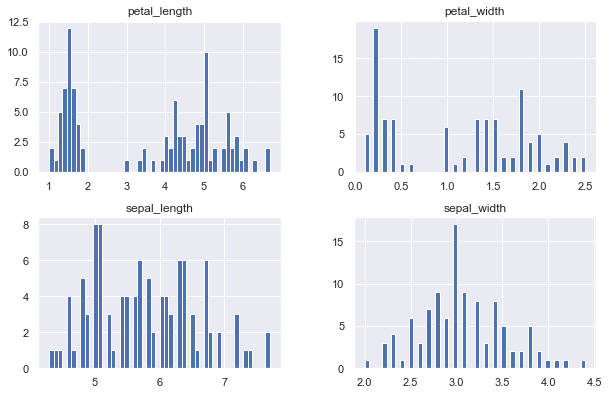

In [6]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 2));

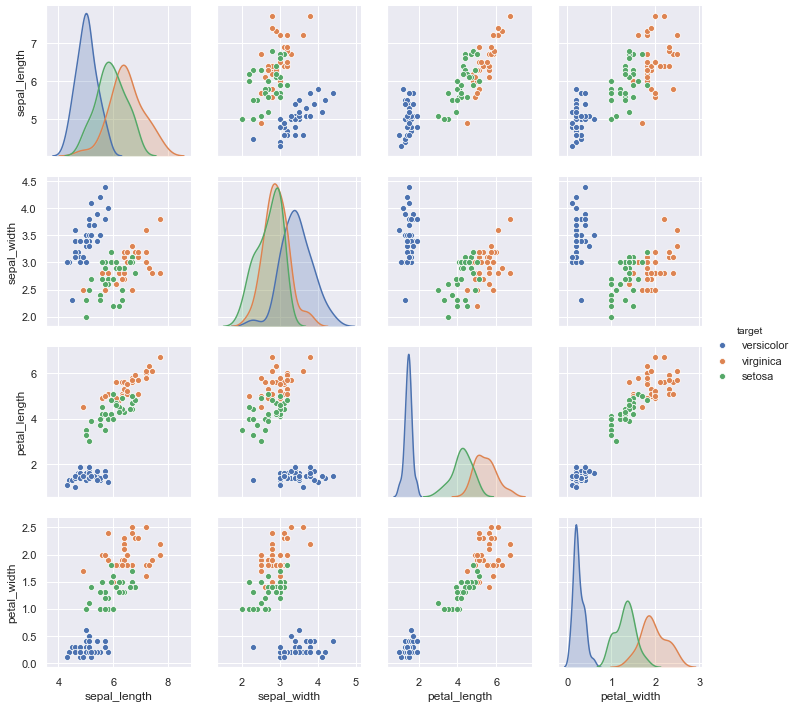

In [7]:
sns.pairplot(data, hue="target")

# Step 2: Building a predictive model

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [8]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print(D)

Info file found : /home/adrien/Documents/competition-examples/v2/iris/input_data/iris_public.info
DataManager : iris
info:
	usage = Test
data:
	X_train = array(105, 4)
	name = iris
data:
	X_train = array(105, 4)
	task = multiclass.classification
data:
	X_train = array(105, 4)
	metric = bac_multiclass
data:
	X_train = array(105, 4)
	feat_type = Numerical
data:
	X_train = array(105, 4)
	feat_num = 4
data:
	X_train = array(105, 4)
	target_num = 1
data:
	X_train = array(105, 4)
	label_num = 3
data:
	X_train = array(105, 4)
	train_num = 105
data:
	X_train = array(105, 4)
	valid_num = 15
data:
	X_train = array(105, 4)
	test_num = 30
data:
	X_train = array(105, 4)
	has_categorical = 0
data:
	X_train = array(105, 4)
	has_missing = 0
data:
	X_train = array(105, 4)
	is_sparse = 0
data:
	X_train = array(105, 4)
	time_budget = 600
data:
	X_train = array(105, 4)
	format = dense
data:
	X_train = array(105, 4)
	Y_train = array(105, 3)
	X_valid = array(15, 4)
	X_test = array(30, 4)
feat_type:	array(4,

## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [9]:
from model import model
??model

Create an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

In [10]:
M = model()

Train and run your predictive model. If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. So delete iris_model.pickle from sample_code_submission if you do not want this to happen.

In [11]:
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

FIT: dim(X)= [105, 4]
FIT: dim(y)= [105, 3]
PREDICT: dim(X)= [105, 4]
PREDICT: dim(y)= [105, 3]
PREDICT: dim(X)= [15, 4]
PREDICT: dim(y)= [15, 3]
PREDICT: dim(X)= [30, 4]
PREDICT: dim(y)= [30, 3]


Save the trained model (will be ready to reload next time around) and save the prediction results:

In [12]:
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/iris_test.predict
sample_result_submission/iris_train.predict
sample_result_submission/iris_valid.predict


## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.

In [13]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print('Using scoring metric:', metric_name)
??scoring_function

Using scoring metric: mse_metric


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [14]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the mse_metric metric = 0.3333
Ideal score for the mse_metric metric = 0.0000


Be careful: some metrics use one-hot encoding for multi-class classification problems, but other use class numbers. So you need to convert the target values and predicted values if you want to use those. This is the case of `scikit-learn` metrics.

In [15]:
# Convert targets and predictions for vectors of class numbers:
from data_converter import convert_to_num
y_train = convert_to_num(Y_train)
y_hat_train = convert_to_num(Y_hat_train)
# Compute accuracy and confusion matrix:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#print 'y_train     =' , y_train
#print 'y_hat_train =' , y_hat_train
print('Training accuracy = %5.4f' % accuracy_score(y_train, y_hat_train))
print('Confusion matrix [known in lines, predicted in columns]=\n',confusion_matrix(y_train, y_hat_train))

	Converting to numeric vector
[1. 1. 2. 2. 1. 1. 0. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 0. 0. 1. 1. 2. 0.
 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 0. 1. 2. 2. 2. 1. 1. 2. 0. 1. 2. 2. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 2. 0. 2. 0. 2. 0. 2. 1. 0. 2. 2. 1. 1. 1. 1.
 2. 1. 2. 2. 1. 1. 0. 0. 1. 1. 2. 1. 1. 1. 0. 0. 1. 0. 1. 1. 2. 0. 0. 2.
 0. 2. 0. 0. 2. 0. 0. 0. 0.]
	Converting to numeric vector
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training accuracy = 0.2857
Confusion matrix [known in lines, predicted in columns]=
 [[30  0  0]
 [40  0  0]
 [35  0  0]]


### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development.

In [16]:
from sklearn.model_selection import StratifiedKFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
skf = StratifiedKFold(n_splits=n) 
skf.get_n_splits(X_train, y_train)
i=0
scores = zeros(n)
for idx_t, idx_v in skf.split(X_train, y_train):
    Xtr = X_train[idx_t]
    Ytr = Y_train[idx_t]
    Xva = X_train[idx_v]
    Yva = Y_train[idx_v]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print('Average score = ', mean(scores))

FIT: dim(X)= [69, 4]
FIT: dim(y)= [69, 3]
PREDICT: dim(X)= [36, 4]
PREDICT: dim(y)= [36, 3]
Fold 1 example metric =  0.3333333333333333
FIT: dim(X)= [70, 4]
FIT: dim(y)= [70, 3]
PREDICT: dim(X)= [35, 4]
PREDICT: dim(y)= [35, 3]
Fold 2 example metric =  0.3333333333333333
FIT: dim(X)= [71, 4]
FIT: dim(y)= [71, 3]
PREDICT: dim(X)= [34, 4]
PREDICT: dim(y)= [34, 3]
Fold 3 example metric =  0.3333333333333333
Average score =  0.3333333333333333


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [17]:
outdir = 'sample_result_submission'     

In [18]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /home/adrien/Documents/competition-examples/v2/iris/input_data
Using output_dir: /home/adrien/Documents/competition-examples/v2/iris/starting_kit/sample_result_submission
Using program_dir: /home/adrien/Documents/competition-examples/v2/iris/ingestion_program
Using submission_dir: /home/adrien/Documents/competition-examples/v2/iris/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Iris ********
************************************************
========= Reading and converting data ==========
Info file found : /home/adrien/Documents/competition-examples/v2/iris/input_data/iris_public.info
========= Reading /home/adrien/Documents/competition-examples/v2/iris/input_data/iris_feat.type
[+] Success in  0.00 sec
========= Reading /home/adrien/Documents/competition-examples/v2/iris/input_data/iris_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.